# ISDS 577 Personalized Medicine Redefining Cancer Treatment

## Exploratory Data Analysis

In [1]:
# Loading all required packages
import nltk
nltk.download("stopwords")
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roy_geek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
# Loading training_variants. Its a comma seperated file
data_variants = pd.read_csv('M:/Semester 4/ISDS 577/training/training/training_variants')
# Loading training_text dataset. This is seperated by ||
data_text =pd.read_csv('M:/Semester 4/ISDS 577/training/training/training_text',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [3]:
data_variants.head(3)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2


<p>
    There are 4 fields above: <br>
    <ul>
        <li><b>ID : </b>row id used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> class value 1-9, this genetic mutation has been classified on</li>
    </ul>
    


In [4]:
data_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
data_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [6]:
# Checking dimention of data
data_variants.shape

(3321, 4)

In [7]:
# Clecking column in above data set
data_variants.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

In [8]:
data_text.head(3)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...


* So above dataset have 2 columns. 
* ID and Text column.
* We can also observe column ID which is common in both the dataset. 

In [9]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
TEXT    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [10]:
data_text.describe()

,ID
count,3321.000000
mean,1660.000000
std,958.834449
min,0.000000
25%,830.000000
50%,1660.000000
75%,2490.000000
max,3320.000000


In [11]:
data_text.columns

Index(['ID', 'TEXT'], dtype='object')

In [12]:
# checking the dimentions
data_text.shape

(3321, 2)

So, in short my datasets looks like this
 * data_variants (ID, Gene, Variations, Class)
 * data_text(ID, text)

In [16]:
data_variants.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

* This is descrete data so it is ***classification*** problem and since there are multiple descrete output possible so we can call it ***Multi class*** classification problem

In [18]:
data_variants.describe(include='all')

,ID,Gene,Variation,Class
count,3321.000000,3321,3321,3321.000000
unique,NaN,264,2996,NaN
top,NaN,BRCA1,Truncating Mutations,NaN
freq,NaN,264,93,NaN
mean,1660.000000,NaN,NaN,4.365854
std,958.834449,NaN,NaN,2.309781
min,0.000000,NaN,NaN,1.000000
25%,830.000000,NaN,NaN,2.000000
50%,1660.000000,NaN,NaN,4.000000
75%,2490.000000,NaN,NaN,7.000000


* There are 264 unique Genes. 
* There are 2996 unique Variations of mutations. 
* Total 3321 rowsSo, in short my datasets looks like this

In [21]:
data_text.describe(include='all')

,ID,TEXT
count,3321.000000,3316
unique,NaN,1920
top,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,53
mean,1660.000000,NaN
std,958.834449,NaN
min,0.000000,NaN
25%,830.000000,NaN
50%,1660.000000,NaN
75%,2490.000000,NaN


* There are roughly 1920 unique text fields. 
* The most repeated one beeing repeated 53 times

## Univariant Analysis
## Number of Classes

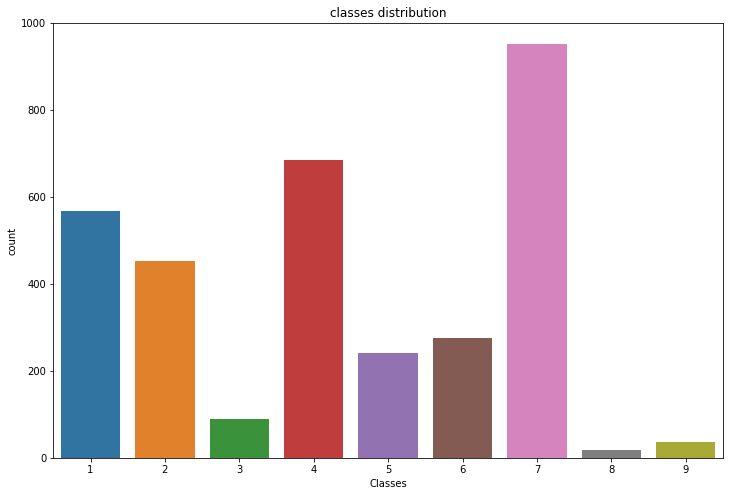

In [24]:
plt.figure(figsize=(12,8))
plt.title("classes distribution")
#(1-9 the class this genetic mutation has been classified on)
sns.countplot(x="Class", data=data_variants)
plt.xlabel("Classes")
plt.show()

* Given dataset is unbalanced.  
* Class 7 is the most dominating one. 
* Class 8, 9, 3 are relatively very small

## Gene
* As we know from the summary we have total 264 different genes.
* let's view the rough picture of frequency of these genes

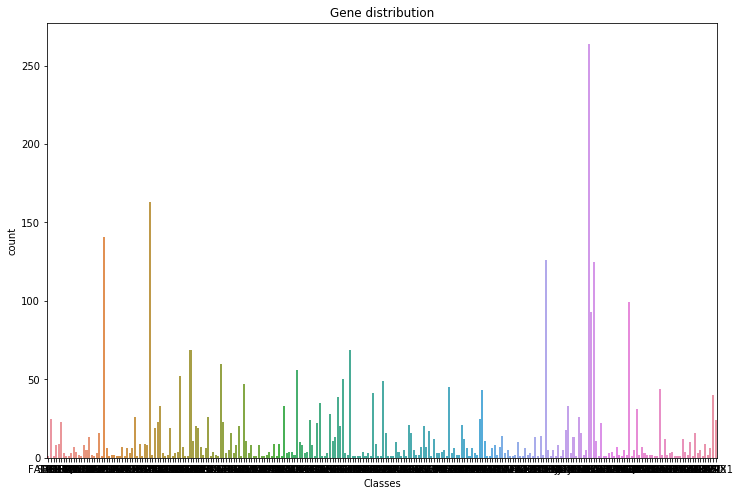

In [28]:
plt.figure(figsize=(12,8))
plt.title("Gene distribution")
#(1-9 the class this genetic mutation has been classified on)
sns.countplot(x="Gene", data=data_variants)
plt.xlabel("Classes")
plt.show()

* we can observe that few classes are super dominant


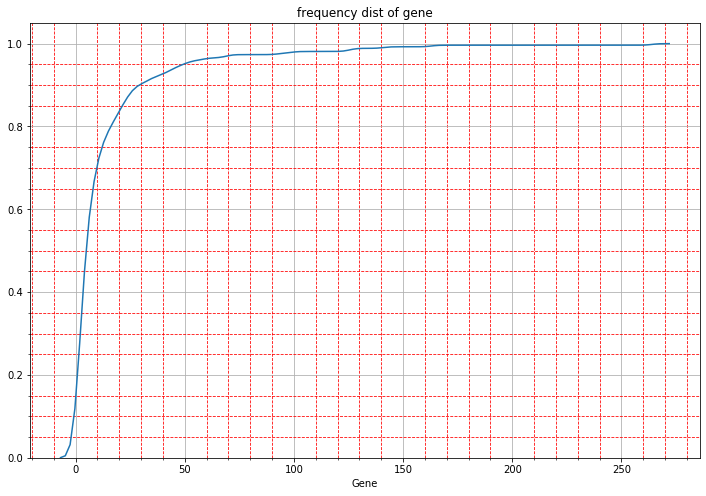

In [45]:
#frequency distribution plot
plt.figure(figsize=(12,8))
plt.title('frequency dist of gene')
sns.distplot(sorted(data_variants["Gene"].value_counts().tolist(), reverse=True), hist = False, kde_kws=dict(cumulative=True))
plt.xlabel('Gene')
plt.grid()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

* 20 types of genes constitutes the 80% total counts
* 50 types of genes constitute 87.5% of total counts

## What are these top 20 genes?

In [33]:
data_variants["Gene"].value_counts()[:20]

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
Name: Gene, dtype: int64

* Top five genes are super dominant with BRCA1 leading the list

#Gene vs Class

 ## Most frequent genes (top 20) vs Classes

In [46]:
def selectTopGene(top):
  tmp_list = data_variants["Gene"].value_counts()[:top].index.tolist()
  tmp_df = data_variants[data_variants['Gene'].isin(tmp_list)]
  #print(tmp_df)
  return tmp_df

In [65]:
def drawClassVsTopGeneFacet(top):
  tmp_df = selectTopGene(top)
  fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(25,22))
  for i in range(3):
    for j in range(3):
      tmp_df_1 = tmp_df[tmp_df['Class'] == ((i*3+j)+1)].groupby('Gene').size().reset_index(name='counts')
      tmp_df_1 = tmp_df_1.sort_values('counts', ascending=False)
      tmp_df_top_7 = tmp_df_1[:]
      axs[i][j].set_title('for Class ' + str((i*3+j)+1))
      plt.sca(axs[i][j])
      plt.xticks(rotation=30)
      sns.barplot(x="Gene", y="counts", data=tmp_df_top_7, ax=axs[i][j])

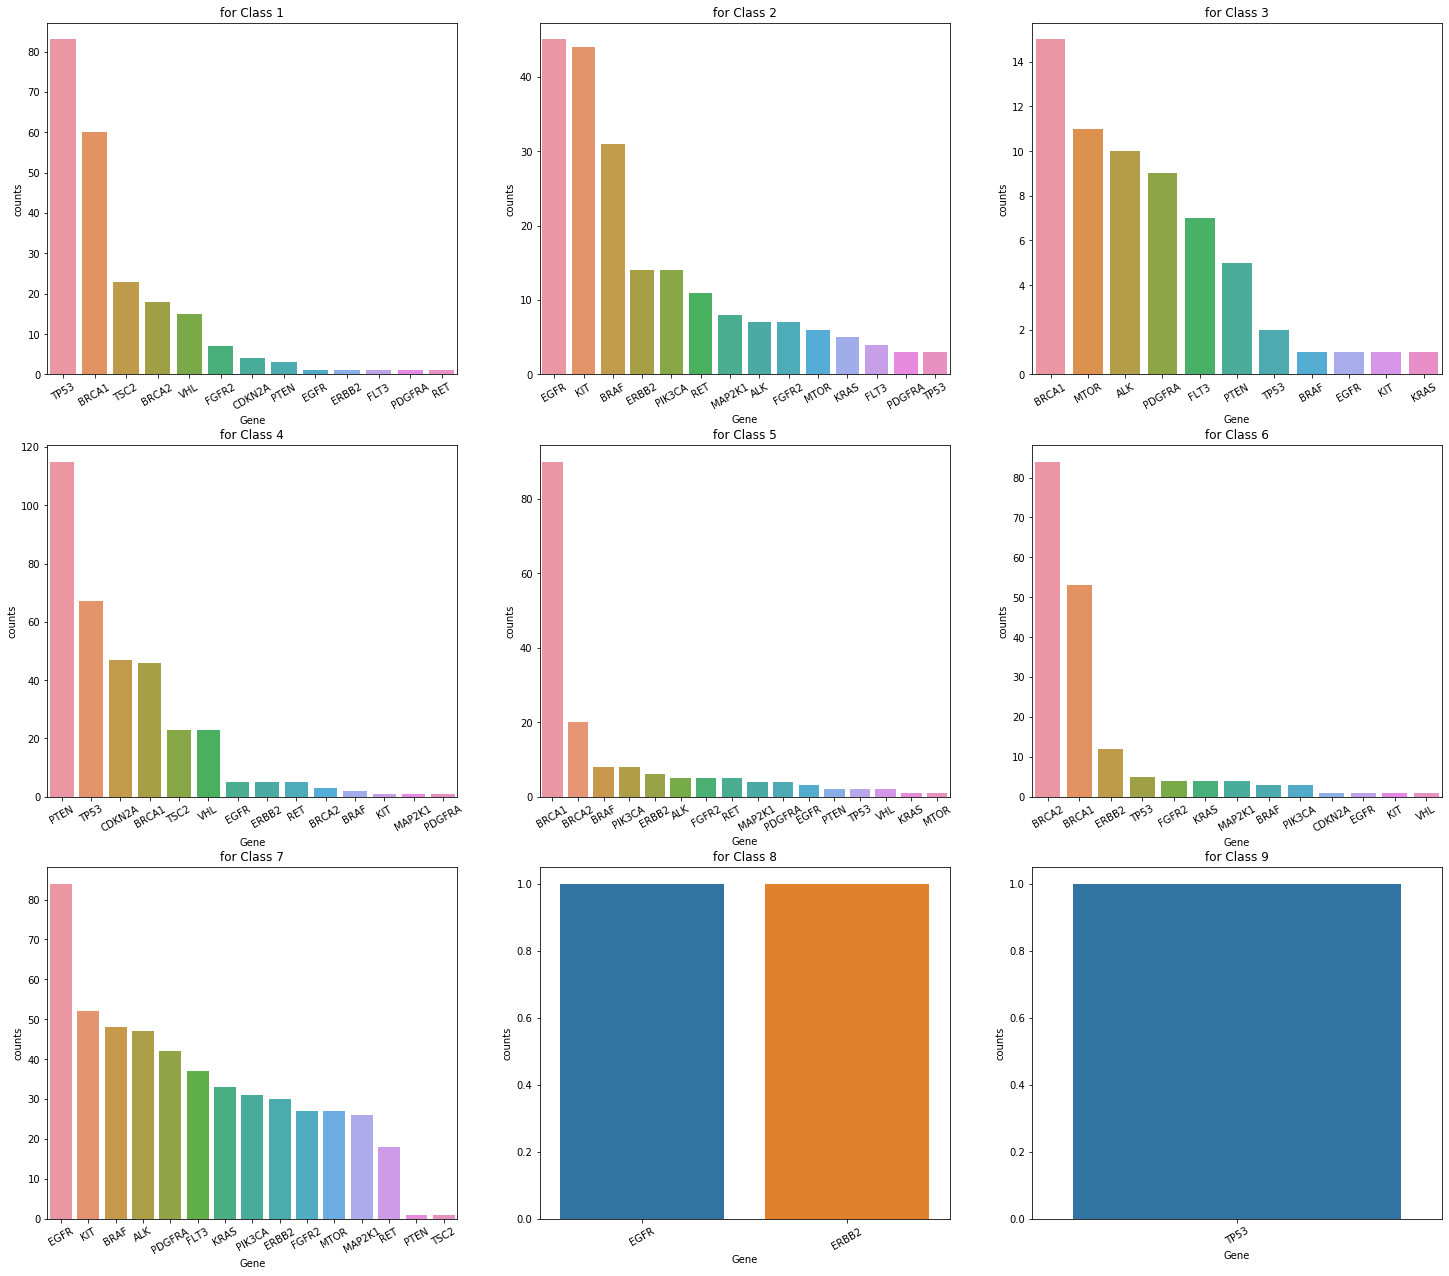

In [66]:
drawClassVsTopGeneFacet(20)

* For Class 8 and 9 EGFR, ERBB2 and TP53 are the most dominating ones
* EGFR is dominating in class 8, 7, 2
* TP53 is most dominating in 1, 9
* BRCA1 is dominating in class 3 and 5
* PTEN is dominating in class 4
* For Class 8 and 9 top 20 Genes appeared only once, it suggests class 8 and 9 are most dissimilar from others or from the total counts of class 8 and 9 are severly underrepresented